## **MODELAGEM PREDITIVA DE CHURN (CASE SERASA)**

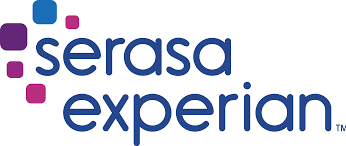

#### **Carregando Bibliotecas e Dataset**

In [1]:
#Carregando as Bibliotecas para Analise, Tratamento e Visualizacao dos dados
!pip install sweetviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
sns.set()

#Carregando as Bibliotecas para Aplicacao de Modelos e Metricas
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 4.3 MB/s 


In [2]:
#Importando os Datasets
df = pd.read_csv('df_case_data_analytics.csv')

#### **Analise Exploratoria dos Dados**

In [3]:
#Visualizando as 5 primeiras/ultimas linhas
display(df)

,Unnamed: 0,CUSTOMER_ID,SERVICO_TELEFONE,CNAE,PORTE,ESTADO,SERVICO_INTERNET,SERVICO_STREAMING,TENURE,QTD_CONTRATO,...,QTD_SUPORTE_MOTIVO_24_M12,QTD_SUPORTE_MOTIVO_24_M18,QTD_SUPORTE_MOTIVO_24_M24,QTD_SUPORTE_MOTIVO_25_M1,QTD_SUPORTE_MOTIVO_25_M3,QTD_SUPORTE_MOTIVO_25_M6,QTD_SUPORTE_MOTIVO_25_M12,QTD_SUPORTE_MOTIVO_25_M18,QTD_SUPORTE_MOTIVO_25_M24,TARGET
0,0,1,N,4661300,GG,SP,0,0,28,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2,N,3250701,M,SP,0,0,28,1,...,0,0,0,0,0,0,0,0,0,0
2,2,3,N,3250705,P,SP,0,0,28,1,...,0,0,0,0,0,0,0,0,0,0
3,3,4,N,4672900,P,SP,0,0,28,1,...,0,0,0,0,0,0,0,1,1,0
4,4,5,N,4663000,GG,SP,0,0,28,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,1820,1821,N,1062700,GG,RS,0,0,56,1,...,0,0,0,0,0,0,0,0,0,1
1821,1821,1822,N,1041400,GG,RS,0,0,51,2,...,0,0,0,0,0,0,0,0,0,1
1822,1822,1823,N,4635402,GG,RS,0,0,52,1,...,0,0,0,0,0,0,0,0,0,0
1823,1823,1824,N,1112700,GG,RS,0,0,53,1,...,0,0,0,0,0,0,0,0,0,1


In [4]:
#Verificando um Resumo do Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Columns: 211 entries, Unnamed: 0 to TARGET
dtypes: float64(25), int64(183), object(3)
memory usage: 2.9+ MB


In [5]:
#Verificando a Nomenclatura das Variaveis (Colunas)
print(list(df.columns))

['Unnamed: 0', 'CUSTOMER_ID', 'SERVICO_TELEFONE', 'CNAE', 'PORTE', 'ESTADO', 'SERVICO_INTERNET', 'SERVICO_STREAMING', 'TENURE', 'QTD_CONTRATO', 'TEMPO_MESES_CONTRATO', 'VALOR_MEDIO_PLANO', 'QTD_RECARGAS_M1', 'QTD_RECARGAS_M2', 'QTD_RECARGAS_M3', 'QTD_RECARGAS_M4', 'QTD_RECARGAS_M5', 'QTD_RECARGAS_M6', 'QTD_RECARGAS_M7', 'QTD_RECARGAS_M8', 'QTD_RECARGAS_M9', 'QTD_RECARGAS_M10', 'QTD_RECARGAS_M11', 'QTD_RECARGAS_M12', 'QTD_RECARGAS_M13', 'QTD_RECARGAS_M14', 'QTD_RECARGAS_M15', 'QTD_RECARGAS_M16', 'QTD_RECARGAS_M17', 'QTD_RECARGAS_M18', 'QTD_RECARGAS_M19', 'QTD_RECARGAS_M20', 'QTD_RECARGAS_M21', 'QTD_RECARGAS_M22', 'QTD_RECARGAS_M23', 'QTD_RECARGAS_M24', 'VLR_RECARGAS_M1', 'VLR_RECARGAS_M2', 'VLR_RECARGAS_M3', 'VLR_RECARGAS_M4', 'VLR_RECARGAS_M5', 'VLR_RECARGAS_M6', 'VLR_RECARGAS_M7', 'VLR_RECARGAS_M8', 'VLR_RECARGAS_M9', 'VLR_RECARGAS_M10', 'VLR_RECARGAS_M11', 'VLR_RECARGAS_M12', 'VLR_RECARGAS_M13', 'VLR_RECARGAS_M14', 'VLR_RECARGAS_M15', 'VLR_RECARGAS_M16', 'VLR_RECARGAS_M17', 'VLR_RECA

In [6]:
#Analisando um resumo estatistico do dataset (summarise)
df.describe(include = 'all')

,Unnamed: 0,CUSTOMER_ID,SERVICO_TELEFONE,CNAE,PORTE,ESTADO,SERVICO_INTERNET,SERVICO_STREAMING,TENURE,QTD_CONTRATO,...,QTD_SUPORTE_MOTIVO_24_M12,QTD_SUPORTE_MOTIVO_24_M18,QTD_SUPORTE_MOTIVO_24_M24,QTD_SUPORTE_MOTIVO_25_M1,QTD_SUPORTE_MOTIVO_25_M3,QTD_SUPORTE_MOTIVO_25_M6,QTD_SUPORTE_MOTIVO_25_M12,QTD_SUPORTE_MOTIVO_25_M18,QTD_SUPORTE_MOTIVO_25_M24,TARGET
count,1825.000000,1825.000000,1815,1.825000e+03,1825,1824,1825.000000,1825.000000,1825.000000,1825.000000,...,1825.000000,1825.000000,1825.000000,1825.0,1825.0,1825.0,1825.000000,1825.000000,1825.000000,1825.000000
unique,NaN,NaN,1,NaN,5,26,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,N,NaN,GG,SP,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1815,NaN,654,843,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,912.000000,913.000000,NaN,4.403599e+06,NaN,NaN,0.058630,0.037260,30.109041,1.196164,...,0.018630,0.102466,0.165479,0.0,0.0,0.0,0.019726,0.044932,0.046027,0.083836
std,526.976438,526.976438,NaN,2.070631e+06,NaN,NaN,0.234996,0.189451,14.564084,0.459890,...,0.213788,0.504279,0.629164,0.0,0.0,0.0,0.230952,0.349118,0.350543,0.277217
min,0.000000,1.000000,NaN,1.156000e+05,NaN,NaN,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,456.000000,457.000000,NaN,2.710402e+06,NaN,NaN,0.000000,0.000000,19.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
50%,912.000000,913.000000,NaN,4.644301e+06,NaN,NaN,0.000000,0.000000,27.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
75%,1368.000000,1369.000000,NaN,5.250801e+06,NaN,NaN,0.000000,0.000000,40.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000


**HIGHIGHTS:**

1. *As colunas **'Unnamed: 0'** e **CUSTOMER_ID** poderão ser excluidas por não se apresentarem como variaveis explicativas para o modelo;*
2. *O Dataset possui 3 variaveis categoricas (**'SERVICO_TELEFONE'**, **'PORTE'** e **'ESTADO'**) que serao tranformadas em dummies para melhor entendimento do modelo.*
3. *Entendemos que a variavel **CNAE** pode ser explicativa para o modelo, pois um detaerminado ramo de atividade pode estar com maior registros de churn. Como a variavel esta classificada com 'int', iremos tranforma-la em categorica e posteriormente em dummy.*
4. *Demais variaveis deverão passar por um processo de padronizacao, para nao enviasar o modelo com ponderacao arbitraria.*

Todos esses e outros ajustes serão feitos na secao de Tratamento de Dados.

In [7]:
#Analisando a correlacao da variavel 'TARGET' com as demais
df.corr()['TARGET'].sort_values(ascending = False)

TARGET                      1.000000
VLR_RECARGAS_M22            0.145947
VLR_RECARGAS_M12            0.140453
VLR_RECARGAS_M24            0.140332
VLR_RECARGAS_M18            0.131497
                              ...   
QTD_SUPORTE_MOTIVO_24_M3         NaN
QTD_SUPORTE_MOTIVO_24_M6         NaN
QTD_SUPORTE_MOTIVO_25_M1         NaN
QTD_SUPORTE_MOTIVO_25_M3         NaN
QTD_SUPORTE_MOTIVO_25_M6         NaN
Name: TARGET, Length: 208, dtype: float64

**HIGHIGHTS:**

1. *A priori, verificamos baixa correlacao entre a variavel 'TARGET' que indica a ocorrencia ou nao de Churn e as demais. A maior correlacao se da em relacao a valores de recargas, porem com pouca significancia estatistica*

#### **Analise Grafica das Principais Variaveis do Dataset** 


##### Plotando Manualmente os Comandos
##### *Forma classica de Analise Exploratoria*

Text(0.5, 1.0, 'CHURN')

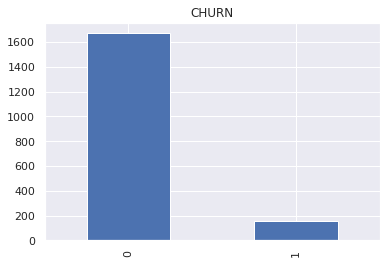

In [8]:
#Plotando a variavel Churn
df['TARGET'].value_counts().plot(kind = 'bar').set_title('CHURN')

In [9]:
#Analisando a Frenquencia Relativa da variavel Churn
(df.TARGET.value_counts())/(df.TARGET.count())

0    0.916164
1    0.083836
Name: TARGET, dtype: float64

**HIGHLIGHTS:**

1.   Aqui verificamos desbalancemanto na variavel dependente que vamos usar no modelo. Da quantidade total de clientes, apenas 8% cancelaram o seu plano, enquanto 92% continuaram ativos.
O desbalanceamento pode provocar um 'vicio' no modelo, que por estar recebendo mais observacoes de clientes "nao churn" acaba inferindo com maior frequencia essa variavel.

Necessario analisar a melhor tecnica de balanceamento para a variavel (Over-sampling/Under-samplig).

(<matplotlib.axes._subplots.AxesSubplot at 0x7f8025e0d810>,
 Text(0.5, 1.0, 'VALOR MEDIO/MES DO PLANO'))

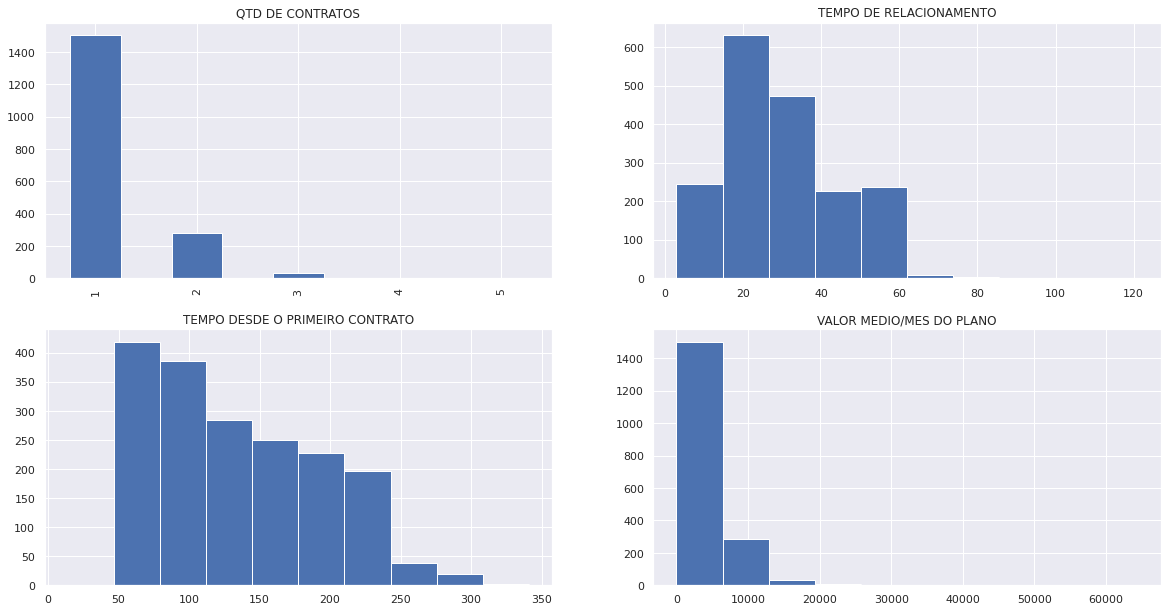

In [10]:
#Plotando as principais variaveis quantitativas das caracteristicas do contrato
plt.figure(figsize = (20,16))
plt.subplot(3, 2, 1), df['QTD_CONTRATO'].value_counts().plot(kind = 'bar').set_title('QTD DE CONTRATOS')
plt.subplot(3, 2, 2), df['TENURE'].hist().set_title('TEMPO DE RELACIONAMENTO')
plt.subplot(3, 2, 3), df['TEMPO_MESES_CONTRATO'].hist().set_title('TEMPO DESDE O PRIMEIRO CONTRATO')
plt.subplot(3, 2, 4), df['VALOR_MEDIO_PLANO'].hist().set_title('VALOR MEDIO/MES DO PLANO')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f802575f750>,
 Text(0.5, 1.0, 'POSSUI SERVICO DE STREAMING'))

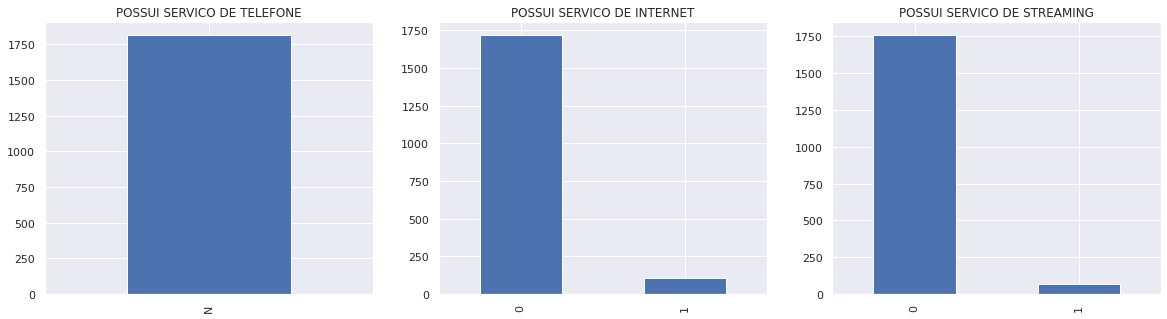

In [11]:
#Plotando as principais variaveis quantitativas dos Tipos de Servicos
plt.figure(figsize = (20,5))
plt.subplot(1, 3, 1), df['SERVICO_TELEFONE'].value_counts().plot(kind = 'bar').set_title('POSSUI SERVICO DE TELEFONE')
plt.subplot(1, 3, 2), df['SERVICO_INTERNET'].value_counts().plot(kind = 'bar').set_title('POSSUI SERVICO DE INTERNET')
plt.subplot(1, 3, 3), df['SERVICO_STREAMING'].value_counts().plot(kind = 'bar').set_title('POSSUI SERVICO DE STREAMING')

HIGHLIGHTS:

1.   *Nenhum cliente possui **'SERVICO_TELEFONE'**. Poderiamos retira-la das variaveis explicativas para o modelo, porem vamos transforma-la em numerica e mante-la no dataset.*
2.   *Verifica-se um desbalanceamento na quantidade de clientes que possuem **'SERVICO_INTERNET'** e **'SERVICO_STREAMING'** em relação aos que não possuem. Entendemos que tais variaveis podem ser explicativas para o modelo e esse desbalanceamento pode impactar.*

(<matplotlib.axes._subplots.AxesSubplot at 0x7f8025eef0d0>,
 Text(0.5, 1.0, 'PORTE DO CLIENTE'))

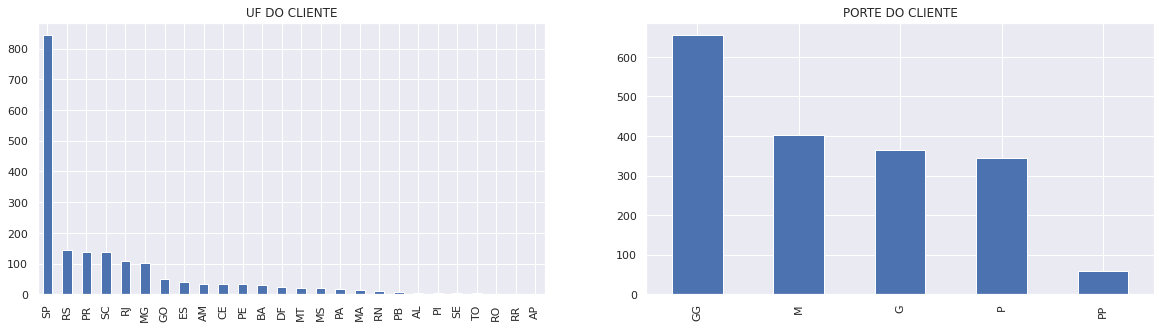

In [12]:
#Plotando as principais variaveis categoricas
plt.figure(figsize = (20,5)) 
plt.subplot(1, 2, 1), df['ESTADO'].value_counts().plot(kind = 'bar').set_title('UF DO CLIENTE')
plt.subplot(1, 2, 2), df['PORTE'].value_counts().plot(kind = 'bar').set_title('PORTE DO CLIENTE')

In [13]:
#Analisando a Frenquencia Relativa da variavel UF
(df.ESTADO.value_counts())/(df.ESTADO.count())

SP    0.462171
RS    0.079496
PR    0.075658
SC    0.075110
RJ    0.058662
MG    0.055921
GO    0.027412
ES    0.021382
AM    0.018640
CE    0.018092
PE    0.017544
BA    0.016447
DF    0.013706
MT    0.011513
MS    0.011513
PA    0.009868
MA    0.007127
RN    0.005482
PB    0.004934
AL    0.002193
PI    0.002193
SE    0.001645
TO    0.001645
RO    0.000548
RR    0.000548
AP    0.000548
Name: ESTADO, dtype: float64

In [14]:
#Analisando a Frenquencia Relativa da variavel UF
(df.PORTE.value_counts())/(df.PORTE.count())

GG    0.358356
M     0.220822
G     0.199452
P     0.188493
PP    0.032877
Name: PORTE, dtype: float64

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


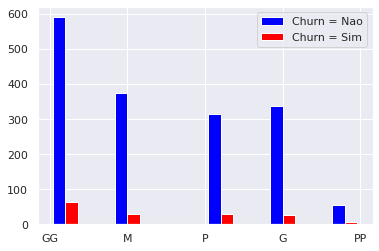

In [15]:
#Plotando a Relacao de Churn por Porte do Cliente
df0 = df[df.TARGET == 0].PORTE
df1 = df[df.TARGET == 1].PORTE
plt.hist([df0, df1], color = ['blue', 'red'], label = ['Churn = Nao', 'Churn = Sim'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


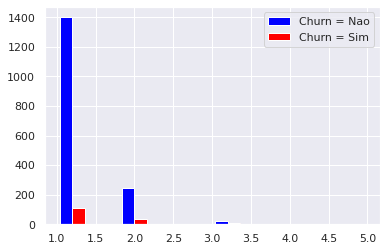

In [16]:
#Plotando a Relacao de Churn por Quantidade de Contratos
df0 = df[df.TARGET == 0].QTD_CONTRATO
df1 = df[df.TARGET == 1].QTD_CONTRATO
plt.hist([df0, df1], color = ['blue', 'red'], label = ['Churn = Nao', 'Churn = Sim'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


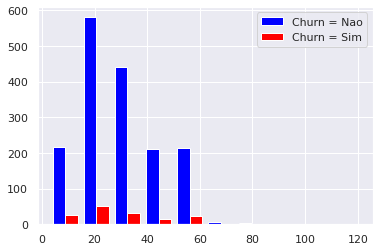

In [17]:
#Plotando a Relacao de Churn por Tempo de Relacionamento
df0 = df[df.TARGET == 0].TENURE
df1 = df[df.TARGET == 1].TENURE
plt.hist([df0, df1], color = ['blue', 'red'], label = ['Churn = Nao', 'Churn = Sim'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


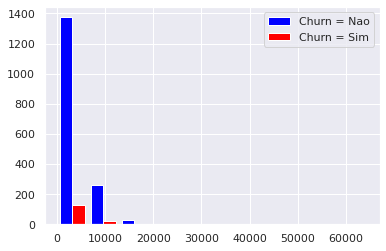

In [18]:
#Plotando a Relacao de Churn por Valor Medio do Plano
df0 = df[df.TARGET == 0].VALOR_MEDIO_PLANO
df1 = df[df.TARGET == 1].VALOR_MEDIO_PLANO
plt.hist([df0, df1], color = ['blue', 'red'], label = ['Churn = Nao', 'Churn = Sim'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


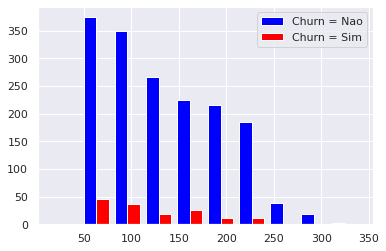

In [19]:
#Plotando a Relacao de Churn por Valor Medio do Plano
df0 = df[df.TARGET == 0].TEMPO_MESES_CONTRATO
df1 = df[df.TARGET == 1].TEMPO_MESES_CONTRATO
plt.hist([df0, df1], color = ['blue', 'red'], label = ['Churn = Nao', 'Churn = Sim'])
plt.legend()

##### Plotando Automaticamente atraves do Sweetviz
##### *Forma pratica de Analise exploratoria*

In [20]:
#Criando um df especifico com algumas colunas do dataset para utilizar no Sweetviz
df_viz = df.reindex(columns = ['ESTADO',
                               'PORTE', 
                               'CNAE',
                               'TENURE',
                               'QTD_CONTRATO',
                               'TEMPO_MESES_CONTRATO',
                               'VALOR_MEDIO_PLANO',
                               'SERVICO_TELEFONE',
                               'SERVICO_INTERNET',
                               'SERVICO_STREAMING',
                               'TARGET'])

In [21]:
#Plotando as principais Variaveis Atraves do Sweetviz
#Apos a execucao do comando, é necessario baixar arquivo html salvo nas pastas e analisar no navegador
sv.analyze(df_viz).show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**HIGHLIGHTS:**

1.   *80% dos clientes estao concentrados na Região Sudeste, com forte dependencia do Estado de SP (46%);*
2.   *58% dos clientes são de Grande Porte, indicado que pode haver um poder de barganha forte desses com a empresa.*
3.   *Os cientes possuem um relacionamento médio de 30 meses com a empresa.*
4.   *83% dos cientes so possuem 1 contrato;*
6.   *Apenas 6% dos clientes possuem serviço de internet, enquanto 4% possuem servico de streaming;*
7.   *Clientes com empresas de Grande Porte tem maior frequencia de Churn;*
8.   *Clientes que possuem ate 20 meses de relacionamento tem maior frequencia de Churn;*   
9.   *Clientes que possuem apenas 1 contrato tem maior frequencia de Churn;*
10.   *Clientes com ticket medio de ate 15k tem maior frequencia de Churn;*
11.   *Clientes que nao possuem Servido de Internet e Streaming tem maior frequencia de Churn;*

A priori, a maior frequencia de rotação pode se dá em clientes de grande porte, novos, com apenas 1 contrato, baixo ticket medio e que nao contrataram nenhum servico de Internet e Streaming. Porem vale destacar que a frequencia dessas variaveis é representativa, o que leva a tambem ter uma alta frequencia de registros em Churn.

#### **Tratamento dos Dados**

In [22]:
#Verificando a Existencia de Valores Duplicados e, caso haja, somando-os
df.duplicated().sum()

0

In [23]:
#Verificando a Existencia de Missing Values e, caso haja, somando-os
print(list(df.isnull().sum()))

[0, 0, 10, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [24]:
#Verificando a Nomenclatura das Variaveis (Colunas)
print(list(df.columns))

['Unnamed: 0', 'CUSTOMER_ID', 'SERVICO_TELEFONE', 'CNAE', 'PORTE', 'ESTADO', 'SERVICO_INTERNET', 'SERVICO_STREAMING', 'TENURE', 'QTD_CONTRATO', 'TEMPO_MESES_CONTRATO', 'VALOR_MEDIO_PLANO', 'QTD_RECARGAS_M1', 'QTD_RECARGAS_M2', 'QTD_RECARGAS_M3', 'QTD_RECARGAS_M4', 'QTD_RECARGAS_M5', 'QTD_RECARGAS_M6', 'QTD_RECARGAS_M7', 'QTD_RECARGAS_M8', 'QTD_RECARGAS_M9', 'QTD_RECARGAS_M10', 'QTD_RECARGAS_M11', 'QTD_RECARGAS_M12', 'QTD_RECARGAS_M13', 'QTD_RECARGAS_M14', 'QTD_RECARGAS_M15', 'QTD_RECARGAS_M16', 'QTD_RECARGAS_M17', 'QTD_RECARGAS_M18', 'QTD_RECARGAS_M19', 'QTD_RECARGAS_M20', 'QTD_RECARGAS_M21', 'QTD_RECARGAS_M22', 'QTD_RECARGAS_M23', 'QTD_RECARGAS_M24', 'VLR_RECARGAS_M1', 'VLR_RECARGAS_M2', 'VLR_RECARGAS_M3', 'VLR_RECARGAS_M4', 'VLR_RECARGAS_M5', 'VLR_RECARGAS_M6', 'VLR_RECARGAS_M7', 'VLR_RECARGAS_M8', 'VLR_RECARGAS_M9', 'VLR_RECARGAS_M10', 'VLR_RECARGAS_M11', 'VLR_RECARGAS_M12', 'VLR_RECARGAS_M13', 'VLR_RECARGAS_M14', 'VLR_RECARGAS_M15', 'VLR_RECARGAS_M16', 'VLR_RECARGAS_M17', 'VLR_RECA

In [25]:
#Verificando os Missing Values da Variavel 'SERVICO_TELEFONE'
df.SERVICO_TELEFONE.isnull().value_counts()

False    1815
True       10
Name: SERVICO_TELEFONE, dtype: int64

In [26]:
#Verificando os Missing Values da Variavel 'ESTADO'
df.ESTADO.isnull().value_counts()

False    1824
True        1
Name: ESTADO, dtype: int64

Conforme verificado nos output's acima, existem duas variaveis com missing values:

1. *Coluna 3 = **'SERVICO_TELEFONE'**-> 10 Missing Values*
2. *Coluna 6 = **'ESTADO'** -> 1 Missing Values*

Total = 11 Missing Values

A ausencia de valores pode influenciar nos modelos de previsao, e entendendo que um tratamento atraves de medidas de tendencia, como média, moda ou mediana e posterior aplicacao de uma ponderação arbitraria podem tambem enviesar os modelos, decidimos remove-los por representar menos de 1% do dataset.


In [27]:
#Excluindo os Missing Values
df.dropna(inplace = True)

In [28]:
#Verificando a Existencia de Missing Values e, caso haja, somando-os (Pos Tratamento)
print(list(df.isnull().sum()))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [29]:
#Verificando os Missing Values da Variavel 'ESTADO' (Pos Tratamento)
df.ESTADO.isnull().value_counts()

False    1814
Name: ESTADO, dtype: int64

In [30]:
#Verificando os Missing Values da Variavel 'SERVICO_TELEFONE' (Pos Tratamento)
df.SERVICO_TELEFONE.isnull().value_counts()

False    1814
Name: SERVICO_TELEFONE, dtype: int64

Verificamos tambem que a variavel **'SERVICO_TELEFONE'** so possuiu o tipo de registro 'N', ou seja, nenhum cliente do dataset possui esse servico. Vamos altera-la para numerica e atribuir o valor 0.

In [31]:
#Transformando a variavel 'SERVICO_TELEFONE' em numerica
df['SERVICO_TELEFONE'].replace('N', 0, inplace = True)
df.head()

,Unnamed: 0,CUSTOMER_ID,SERVICO_TELEFONE,CNAE,PORTE,ESTADO,SERVICO_INTERNET,SERVICO_STREAMING,TENURE,QTD_CONTRATO,...,QTD_SUPORTE_MOTIVO_24_M12,QTD_SUPORTE_MOTIVO_24_M18,QTD_SUPORTE_MOTIVO_24_M24,QTD_SUPORTE_MOTIVO_25_M1,QTD_SUPORTE_MOTIVO_25_M3,QTD_SUPORTE_MOTIVO_25_M6,QTD_SUPORTE_MOTIVO_25_M12,QTD_SUPORTE_MOTIVO_25_M18,QTD_SUPORTE_MOTIVO_25_M24,TARGET
0,0,1,0,4661300,GG,SP,0,0,28,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2,0,3250701,M,SP,0,0,28,1,...,0,0,0,0,0,0,0,0,0,0
2,2,3,0,3250705,P,SP,0,0,28,1,...,0,0,0,0,0,0,0,0,0,0
3,3,4,0,4672900,P,SP,0,0,28,1,...,0,0,0,0,0,0,0,1,1,0
4,4,5,0,4663000,GG,SP,0,0,28,1,...,0,0,1,0,0,0,0,0,0,0


Nessa etapa iremos transformar a variavel **CNAE** de 'int' para 'str' e a usaremos como explicativa para o modelo, pois um determinado ramo de atividade pode estar com maior registros de churn. Posteriormente iremos transforma-la em dummy para que o modelo interprete corretamente.

In [32]:
#Transformando a variavel 'CNAE' em str
df['CNAE'] = df['CNAE'].astype(str)
df.dtypes

Unnamed: 0                    int64
CUSTOMER_ID                   int64
SERVICO_TELEFONE              int64
CNAE                         object
PORTE                        object
                              ...  
QTD_SUPORTE_MOTIVO_25_M6      int64
QTD_SUPORTE_MOTIVO_25_M12     int64
QTD_SUPORTE_MOTIVO_25_M18     int64
QTD_SUPORTE_MOTIVO_25_M24     int64
TARGET                        int64
Length: 211, dtype: object

Vamos agrupar os valores das colunas que estao com abertura de valores em periodos mensais (***'QTD_RECARGAS_M1',  'VLR_RECARGAS_M1', 'QTD_SUPORTE_MOTIVO_1' a 'QTD_SUPORTE_MOTIVO_25'***), transformando em uma unica coluna com os valores totais. Dessa forma podemos verificar se tais variaveis agrupadas exercer um poder explicativo diferenciado ao modelo.

In [33]:
#Criando uma variavel 'QTD_TOTAL_RECARGAS' a partir da soma das Colunas de QTD_RECARGAS (1 a 24M)
dfrecarga = ['QTD_RECARGAS_M1', 'QTD_RECARGAS_M2', 'QTD_RECARGAS_M3', 'QTD_RECARGAS_M4', 'QTD_RECARGAS_M5', 'QTD_RECARGAS_M6', 'QTD_RECARGAS_M7', 'QTD_RECARGAS_M8', 'QTD_RECARGAS_M9', 'QTD_RECARGAS_M10', 'QTD_RECARGAS_M11', 'QTD_RECARGAS_M12', 'QTD_RECARGAS_M13', 'QTD_RECARGAS_M14', 'QTD_RECARGAS_M15', 'QTD_RECARGAS_M16', 'QTD_RECARGAS_M17', 'QTD_RECARGAS_M18', 'QTD_RECARGAS_M19', 'QTD_RECARGAS_M20', 'QTD_RECARGAS_M21', 'QTD_RECARGAS_M22', 'QTD_RECARGAS_M23', 'QTD_RECARGAS_M24']
df['QTD_TOTAL_RECARGAS'] = df[dfrecarga].sum(axis = 1)

In [34]:
#Criando uma variavel 'VLR_TOTAL_RECARGAS' a partir da soma das Colunas de VLR_TOTAL_RECARGAS (1 a 24M)
dfrecarga = ['VLR_RECARGAS_M1', 'VLR_RECARGAS_M2', 'VLR_RECARGAS_M3', 'VLR_RECARGAS_M4', 'VLR_RECARGAS_M5', 'VLR_RECARGAS_M6', 'VLR_RECARGAS_M7', 'VLR_RECARGAS_M8', 'VLR_RECARGAS_M9', 'VLR_RECARGAS_M10', 'VLR_RECARGAS_M11', 'VLR_RECARGAS_M12', 'VLR_RECARGAS_M13', 'VLR_RECARGAS_M14', 'VLR_RECARGAS_M15', 'VLR_RECARGAS_M16', 'VLR_RECARGAS_M17', 'VLR_RECARGAS_M18', 'VLR_RECARGAS_M19', 'VLR_RECARGAS_M20', 'VLR_RECARGAS_M21', 'VLR_RECARGAS_M22', 'VLR_RECARGAS_M23', 'VLR_RECARGAS_M24']
df['VLR_TOTAL_RECARGAS'] = df[dfrecarga].sum(axis = 1)

In [35]:
#Criando uma variavel 'QTD_SUPORTE_MOTIVO_1' a partir da soma das colunas de QTD_SUPORTE_MOTIVO_1 (1 a 24M)
dfrecarga = ['QTD_SUPORTE_MOTIVO_1_M1', 'QTD_SUPORTE_MOTIVO_1_M3', 'QTD_SUPORTE_MOTIVO_1_M6', 'QTD_SUPORTE_MOTIVO_1_M12', 'QTD_SUPORTE_MOTIVO_1_M18', 'QTD_SUPORTE_MOTIVO_1_M24']
df['TT_SUPORTE_MOTIVO_1'] = df[dfrecarga].sum(axis = 1)

In [36]:
#Criando uma variavel 'QTD_SUPORTE_MOTIVO_2' a partir da soma das colunas de QTD_SUPORTE_MOTIVO_2 (1 a 24M)
dfrecarga = ['QTD_SUPORTE_MOTIVO_2_M1', 'QTD_SUPORTE_MOTIVO_2_M3', 'QTD_SUPORTE_MOTIVO_2_M6', 'QTD_SUPORTE_MOTIVO_2_M12', 'QTD_SUPORTE_MOTIVO_2_M18', 'QTD_SUPORTE_MOTIVO_2_M24']
df['TT_SUPORTE_MOTIVO_2'] = df[dfrecarga].sum(axis = 1)

In [37]:
#Criando uma variavel 'QTD_SUPORTE_MOTIVO_3' a partir da soma das colunas de QTD_SUPORTE_MOTIVO_3 (1 a 24M)
dfrecarga = ['QTD_SUPORTE_MOTIVO_3_M1', 'QTD_SUPORTE_MOTIVO_3_M3', 'QTD_SUPORTE_MOTIVO_3_M6', 'QTD_SUPORTE_MOTIVO_3_M12', 'QTD_SUPORTE_MOTIVO_3_M18', 'QTD_SUPORTE_MOTIVO_3_M24']
df['TT_SUPORTE_MOTIVO_3'] = df[dfrecarga].sum(axis = 1)

In [38]:
#Criando uma variavel 'QTD_SUPORTE_MOTIVO_4' a partir da soma das colunas de QTD_SUPORTE_MOTIVO_4 (1 a 24M)
dfrecarga = ['QTD_SUPORTE_MOTIVO_4_M1', 'QTD_SUPORTE_MOTIVO_4_M3', 'QTD_SUPORTE_MOTIVO_4_M6', 'QTD_SUPORTE_MOTIVO_4_M12', 'QTD_SUPORTE_MOTIVO_4_M18', 'QTD_SUPORTE_MOTIVO_4_M24']
df['TT_SUPORTE_MOTIVO_4'] = df[dfrecarga].sum(axis = 1)

In [39]:
#Criando uma variavel 'QTD_SUPORTE_MOTIVO_5' a partir da soma das colunas de QTD_SUPORTE_MOTIVO_5 (1 a 24M)
dfrecarga = ['QTD_SUPORTE_MOTIVO_5_M1', 'QTD_SUPORTE_MOTIVO_5_M3', 'QTD_SUPORTE_MOTIVO_5_M6', 'QTD_SUPORTE_MOTIVO_5_M12', 'QTD_SUPORTE_MOTIVO_5_M18', 'QTD_SUPORTE_MOTIVO_5_M24']
df['TT_SUPORTE_MOTIVO_5'] = df[dfrecarga].sum(axis = 1)

In [40]:
#Criando uma variavel 'QTD_SUPORTE_MOTIVO_6' a partir da soma das colunas de QTD_SUPORTE_MOTIVO_6 (1 a 24M)
dfrecarga = ['QTD_SUPORTE_MOTIVO_6_M1', 'QTD_SUPORTE_MOTIVO_6_M3', 'QTD_SUPORTE_MOTIVO_6_M6', 'QTD_SUPORTE_MOTIVO_6_M12', 'QTD_SUPORTE_MOTIVO_6_M18', 'QTD_SUPORTE_MOTIVO_6_M24']
df['TT_SUPORTE_MOTIVO_6'] = df[dfrecarga].sum(axis = 1)

In [41]:
#Criando uma variavel 'QTD_SUPORTE_MOTIVO_7' a partir da soma das colunas de QTD_SUPORTE_MOTIVO_7 (1 a 24M)
dfrecarga = ['QTD_SUPORTE_MOTIVO_7_M1', 'QTD_SUPORTE_MOTIVO_7_M3', 'QTD_SUPORTE_MOTIVO_7_M6', 'QTD_SUPORTE_MOTIVO_7_M12', 'QTD_SUPORTE_MOTIVO_7_M18', 'QTD_SUPORTE_MOTIVO_7_M24']
df['TT_SUPORTE_MOTIVO_7'] = df[dfrecarga].sum(axis = 1)

In [42]:
#Criando uma variavel 'QTD_SUPORTE_MOTIVO_8' a partir da soma das colunas de QTD_SUPORTE_MOTIVO_8 (1 a 24M)
dfrecarga = ['QTD_SUPORTE_MOTIVO_8_M1', 'QTD_SUPORTE_MOTIVO_8_M3', 'QTD_SUPORTE_MOTIVO_8_M6', 'QTD_SUPORTE_MOTIVO_8_M12', 'QTD_SUPORTE_MOTIVO_8_M18', 'QTD_SUPORTE_MOTIVO_8_M24']
df['TT_SUPORTE_MOTIVO_8'] = df[dfrecarga].sum(axis = 1)

In [43]:
#Criando uma variavel 'QTD_SUPORTE_MOTIVO_9' a partir da soma das colunas de QTD_SUPORTE_MOTIVO_9 (1 a 24M)
dfrecarga = ['QTD_SUPORTE_MOTIVO_9_M1', 'QTD_SUPORTE_MOTIVO_9_M3', 'QTD_SUPORTE_MOTIVO_9_M6', 'QTD_SUPORTE_MOTIVO_9_M12', 'QTD_SUPORTE_MOTIVO_9_M18', 'QTD_SUPORTE_MOTIVO_9_M24']
df['TT_SUPORTE_MOTIVO_9'] = df[dfrecarga].sum(axis = 1)

In [44]:
#Criando uma variavel 'QTD_SUPORTE_MOTIVO_10' a partir da soma das colunas de QTD_SUPORTE_MOTIVO_10 (1 a 24M)
dfrecarga = ['QTD_SUPORTE_MOTIVO_10_M1', 'QTD_SUPORTE_MOTIVO_10_M3', 'QTD_SUPORTE_MOTIVO_10_M6', 'QTD_SUPORTE_MOTIVO_10_M12', 'QTD_SUPORTE_MOTIVO_10_M18', 'QTD_SUPORTE_MOTIVO_10_M24']
df['TT_SUPORTE_MOTIVO_10'] = df[dfrecarga].sum(axis = 1)

In [45]:
#Criando uma variavel 'QTD_SUPORTE_MOTIVO_11' a partir da soma das colunas de QTD_SUPORTE_MOTIVO_11 (1 a 24M)
dfrecarga = ['QTD_SUPORTE_MOTIVO_11_M1', 'QTD_SUPORTE_MOTIVO_11_M3', 'QTD_SUPORTE_MOTIVO_11_M6', 'QTD_SUPORTE_MOTIVO_11_M12', 'QTD_SUPORTE_MOTIVO_11_M18', 'QTD_SUPORTE_MOTIVO_11_M24']
df['TT_SUPORTE_MOTIVO_11'] = df[dfrecarga].sum(axis = 1)

In [46]:
#Criando uma variavel 'QTD_SUPORTE_MOTIVO_12' a partir da soma das colunas de QTD_SUPORTE_MOTIVO_12 (1 a 24M)
dfrecarga = ['QTD_SUPORTE_MOTIVO_12_M1', 'QTD_SUPORTE_MOTIVO_12_M3', 'QTD_SUPORTE_MOTIVO_12_M6', 'QTD_SUPORTE_MOTIVO_12_M12', 'QTD_SUPORTE_MOTIVO_12_M18', 'QTD_SUPORTE_MOTIVO_12_M24']
df['TT_SUPORTE_MOTIVO_12'] = df[dfrecarga].sum(axis = 1)

In [47]:
#Criando uma variavel 'QTD_SUPORTE_MOTIVO_13' a partir da soma das colunas de QTD_SUPORTE_MOTIVO_13 (1 a 24M)
dfrecarga = ['QTD_SUPORTE_MOTIVO_13_M1', 'QTD_SUPORTE_MOTIVO_13_M3', 'QTD_SUPORTE_MOTIVO_13_M6', 'QTD_SUPORTE_MOTIVO_13_M12', 'QTD_SUPORTE_MOTIVO_13_M18', 'QTD_SUPORTE_MOTIVO_13_M24']
df['TT_SUPORTE_MOTIVO_13'] = df[dfrecarga].sum(axis = 1)

In [48]:
#Criando uma variavel 'QTD_SUPORTE_MOTIVO_14' a partir da soma das colunas de QTD_SUPORTE_MOTIVO_14 (1 a 24M)
dfrecarga = ['QTD_SUPORTE_MOTIVO_14_M1', 'QTD_SUPORTE_MOTIVO_14_M3', 'QTD_SUPORTE_MOTIVO_14_M6', 'QTD_SUPORTE_MOTIVO_14_M12', 'QTD_SUPORTE_MOTIVO_14_M18', 'QTD_SUPORTE_MOTIVO_14_M24']
df['TT_SUPORTE_MOTIVO_14'] = df[dfrecarga].sum(axis = 1)

In [49]:
#Criando uma variavel 'QTD_SUPORTE_MOTIVO_15' a partir da soma das colunas de QTD_SUPORTE_MOTIVO_15 (1 a 24M)
dfrecarga = ['QTD_SUPORTE_MOTIVO_15_M1', 'QTD_SUPORTE_MOTIVO_15_M3', 'QTD_SUPORTE_MOTIVO_15_M6', 'QTD_SUPORTE_MOTIVO_15_M12', 'QTD_SUPORTE_MOTIVO_15_M18', 'QTD_SUPORTE_MOTIVO_15_M24']
df['TT_SUPORTE_MOTIVO_15'] = df[dfrecarga].sum(axis = 1)

In [50]:
#Criando uma variavel 'QTD_SUPORTE_MOTIVO_16' a partir da soma das colunas de QTD_SUPORTE_MOTIVO_16 (1 a 24M)
dfrecarga = ['QTD_SUPORTE_MOTIVO_16_M1', 'QTD_SUPORTE_MOTIVO_16_M3', 'QTD_SUPORTE_MOTIVO_16_M6', 'QTD_SUPORTE_MOTIVO_16_M12', 'QTD_SUPORTE_MOTIVO_16_M18', 'QTD_SUPORTE_MOTIVO_16_M24']
df['TT_SUPORTE_MOTIVO_16'] = df[dfrecarga].sum(axis = 1)

In [51]:
#Criando uma variavel 'QTD_SUPORTE_MOTIVO_17' a partir da soma das colunas de QTD_SUPORTE_MOTIVO_17 (1 a 24M)
dfrecarga = ['QTD_SUPORTE_MOTIVO_17_M1', 'QTD_SUPORTE_MOTIVO_17_M3', 'QTD_SUPORTE_MOTIVO_17_M6', 'QTD_SUPORTE_MOTIVO_17_M12', 'QTD_SUPORTE_MOTIVO_17_M18', 'QTD_SUPORTE_MOTIVO_17_M24']
df['TT_SUPORTE_MOTIVO_17'] = df[dfrecarga].sum(axis = 1)

In [52]:
#Criando uma variavel 'QTD_SUPORTE_MOTIVO_18' a partir da soma das colunas de QTD_SUPORTE_MOTIVO_18 (1 a 24M)
dfrecarga = ['QTD_SUPORTE_MOTIVO_18_M1', 'QTD_SUPORTE_MOTIVO_18_M3', 'QTD_SUPORTE_MOTIVO_18_M6', 'QTD_SUPORTE_MOTIVO_18_M12', 'QTD_SUPORTE_MOTIVO_18_M18', 'QTD_SUPORTE_MOTIVO_18_M24']
df['TT_SUPORTE_MOTIVO_18'] = df[dfrecarga].sum(axis = 1)

In [53]:
#Criando uma variavel 'QTD_SUPORTE_MOTIVO_19' a partir da soma das colunas de QTD_SUPORTE_MOTIVO_19 (1 a 24M)
dfrecarga = ['QTD_SUPORTE_MOTIVO_19_M1', 'QTD_SUPORTE_MOTIVO_19_M3', 'QTD_SUPORTE_MOTIVO_19_M6', 'QTD_SUPORTE_MOTIVO_19_M12', 'QTD_SUPORTE_MOTIVO_19_M18', 'QTD_SUPORTE_MOTIVO_19_M24']
df['TT_SUPORTE_MOTIVO_19'] = df[dfrecarga].sum(axis = 1)

In [54]:
#Criando uma variavel 'QTD_SUPORTE_MOTIVO_20' a partir da soma das colunas de QTD_SUPORTE_MOTIVO_20 (1 a 24M)
dfrecarga = ['QTD_SUPORTE_MOTIVO_20_M1', 'QTD_SUPORTE_MOTIVO_20_M3', 'QTD_SUPORTE_MOTIVO_20_M6', 'QTD_SUPORTE_MOTIVO_20_M12', 'QTD_SUPORTE_MOTIVO_20_M18', 'QTD_SUPORTE_MOTIVO_20_M24']
df['TT_SUPORTE_MOTIVO_20'] = df[dfrecarga].sum(axis = 1)

In [55]:
#Criando uma variavel 'QTD_SUPORTE_MOTIVO_21' a partir da soma das colunas de QTD_SUPORTE_MOTIVO_21 (1 a 24M)
dfrecarga = ['QTD_SUPORTE_MOTIVO_21_M1', 'QTD_SUPORTE_MOTIVO_21_M3', 'QTD_SUPORTE_MOTIVO_21_M6', 'QTD_SUPORTE_MOTIVO_21_M12', 'QTD_SUPORTE_MOTIVO_21_M18', 'QTD_SUPORTE_MOTIVO_21_M24']
df['TT_SUPORTE_MOTIVO_21'] = df[dfrecarga].sum(axis = 1)

In [56]:
#Criando uma variavel 'QTD_SUPORTE_MOTIVO_22' a partir da soma das colunas de QTD_SUPORTE_MOTIVO_22 (1 a 24M)
dfrecarga = ['QTD_SUPORTE_MOTIVO_22_M1', 'QTD_SUPORTE_MOTIVO_22_M3', 'QTD_SUPORTE_MOTIVO_22_M6', 'QTD_SUPORTE_MOTIVO_22_M12', 'QTD_SUPORTE_MOTIVO_22_M18', 'QTD_SUPORTE_MOTIVO_22_M24']
df['TT_SUPORTE_MOTIVO_22'] = df[dfrecarga].sum(axis = 1)

In [57]:
#Criando uma variavel 'QTD_SUPORTE_MOTIVO_23' a partir da soma das colunas de QTD_SUPORTE_MOTIVO_23 (1 a 24M)
dfrecarga = ['QTD_SUPORTE_MOTIVO_23_M1', 'QTD_SUPORTE_MOTIVO_23_M3', 'QTD_SUPORTE_MOTIVO_23_M6', 'QTD_SUPORTE_MOTIVO_23_M12', 'QTD_SUPORTE_MOTIVO_23_M18', 'QTD_SUPORTE_MOTIVO_23_M24']
df['TT_SUPORTE_MOTIVO_23'] = df[dfrecarga].sum(axis = 1)

In [58]:
#Criando uma variavel 'QTD_SUPORTE_MOTIVO_24' a partir da soma das colunas de QTD_SUPORTE_MOTIVO_24 (1 a 24M)
dfrecarga = ['QTD_SUPORTE_MOTIVO_24_M1', 'QTD_SUPORTE_MOTIVO_24_M3', 'QTD_SUPORTE_MOTIVO_24_M6', 'QTD_SUPORTE_MOTIVO_24_M12', 'QTD_SUPORTE_MOTIVO_24_M18', 'QTD_SUPORTE_MOTIVO_24_M24']
df['TT_SUPORTE_MOTIVO_24'] = df[dfrecarga].sum(axis = 1)

In [59]:
#Criando uma variavel 'QTD_SUPORTE_MOTIVO_25' a partir da soma das colunas de QTD_SUPORTE_MOTIVO_25 (1 a 24M)
dfrecarga = ['QTD_SUPORTE_MOTIVO_25_M1', 'QTD_SUPORTE_MOTIVO_25_M3', 'QTD_SUPORTE_MOTIVO_25_M6', 'QTD_SUPORTE_MOTIVO_25_M12', 'QTD_SUPORTE_MOTIVO_25_M18', 'QTD_SUPORTE_MOTIVO_25_M24']
df['TT_SUPORTE_MOTIVO_25'] = df[dfrecarga].sum(axis = 1)

In [60]:
#Visualizando as 5 primeiras linhas (Pos Tratamento)
df.head()

,Unnamed: 0,CUSTOMER_ID,SERVICO_TELEFONE,CNAE,PORTE,ESTADO,SERVICO_INTERNET,SERVICO_STREAMING,TENURE,QTD_CONTRATO,...,TT_SUPORTE_MOTIVO_16,TT_SUPORTE_MOTIVO_17,TT_SUPORTE_MOTIVO_18,TT_SUPORTE_MOTIVO_19,TT_SUPORTE_MOTIVO_20,TT_SUPORTE_MOTIVO_21,TT_SUPORTE_MOTIVO_22,TT_SUPORTE_MOTIVO_23,TT_SUPORTE_MOTIVO_24,TT_SUPORTE_MOTIVO_25
0,0,1,0,4661300,GG,SP,0,0,28,1,...,0,0,0,0,0,0,2,0,0,0
1,1,2,0,3250701,M,SP,0,0,28,1,...,0,0,0,0,1,0,14,0,0,0
2,2,3,0,3250705,P,SP,0,0,28,1,...,0,0,0,0,0,0,3,0,0,0
3,3,4,0,4672900,P,SP,0,0,28,1,...,3,0,0,0,1,0,0,0,0,2
4,4,5,0,4663000,GG,SP,0,0,28,1,...,0,0,0,0,0,0,4,0,1,0


Na secao de **Analise Exploratoria dos Dados** identificamos tambem a possibilidade de excluir colunas **'Unnamed: 0'** e **CUSTOMER_ID**, pois nao serao utilizadas como variaveis explicativas para o modelo. Vamos aproveitar e excluir as colunas que estavam abertas por mes.

In [61]:
#Removendo as colunas 'Unnamed: 0', 'CUSTOMER_ID', 'QTD_RECARGAS_M1', 'VLR_RECARGAS_M1' e 'QTD_SUPORTE_MOTIVO_1' a 'QTD_SUPORTE_MOTIVO_25'.
df.drop(['Unnamed: 0', 'CUSTOMER_ID', 'QTD_RECARGAS_M1', 'QTD_RECARGAS_M2', 'QTD_RECARGAS_M3', 'QTD_RECARGAS_M4', 'QTD_RECARGAS_M5', 'QTD_RECARGAS_M6', 'QTD_RECARGAS_M7', 'QTD_RECARGAS_M8', 'QTD_RECARGAS_M9', 'QTD_RECARGAS_M10', 'QTD_RECARGAS_M11', 'QTD_RECARGAS_M12', 'QTD_RECARGAS_M13', 'QTD_RECARGAS_M14', 'QTD_RECARGAS_M15', 'QTD_RECARGAS_M16', 'QTD_RECARGAS_M17', 'QTD_RECARGAS_M18', 'QTD_RECARGAS_M19', 'QTD_RECARGAS_M20', 'QTD_RECARGAS_M21', 'QTD_RECARGAS_M22', 'QTD_RECARGAS_M23', 'QTD_RECARGAS_M24', 
         'VLR_RECARGAS_M1', 'VLR_RECARGAS_M2', 'VLR_RECARGAS_M3', 'VLR_RECARGAS_M4', 'VLR_RECARGAS_M5', 'VLR_RECARGAS_M6', 'VLR_RECARGAS_M7', 'VLR_RECARGAS_M8', 'VLR_RECARGAS_M9', 'VLR_RECARGAS_M10', 'VLR_RECARGAS_M11', 'VLR_RECARGAS_M12', 'VLR_RECARGAS_M13', 'VLR_RECARGAS_M14', 'VLR_RECARGAS_M15', 'VLR_RECARGAS_M16', 'VLR_RECARGAS_M17', 'VLR_RECARGAS_M18', 'VLR_RECARGAS_M19', 'VLR_RECARGAS_M20', 'VLR_RECARGAS_M21', 'VLR_RECARGAS_M22', 'VLR_RECARGAS_M23', 'VLR_RECARGAS_M24',
         'QTD_SUPORTE_MOTIVO_1_M1', 'QTD_SUPORTE_MOTIVO_1_M3', 'QTD_SUPORTE_MOTIVO_1_M6', 'QTD_SUPORTE_MOTIVO_1_M12', 'QTD_SUPORTE_MOTIVO_1_M18', 'QTD_SUPORTE_MOTIVO_1_M24', 'QTD_SUPORTE_MOTIVO_2_M1', 'QTD_SUPORTE_MOTIVO_2_M3', 'QTD_SUPORTE_MOTIVO_2_M6', 'QTD_SUPORTE_MOTIVO_2_M12', 'QTD_SUPORTE_MOTIVO_2_M18', 'QTD_SUPORTE_MOTIVO_2_M24', 'QTD_SUPORTE_MOTIVO_3_M1', 'QTD_SUPORTE_MOTIVO_3_M3', 'QTD_SUPORTE_MOTIVO_3_M6', 'QTD_SUPORTE_MOTIVO_3_M12', 'QTD_SUPORTE_MOTIVO_3_M18', 'QTD_SUPORTE_MOTIVO_3_M24', 
         'QTD_SUPORTE_MOTIVO_4_M1', 'QTD_SUPORTE_MOTIVO_4_M3', 'QTD_SUPORTE_MOTIVO_4_M6', 'QTD_SUPORTE_MOTIVO_4_M12', 'QTD_SUPORTE_MOTIVO_4_M18', 'QTD_SUPORTE_MOTIVO_4_M24', 'QTD_SUPORTE_MOTIVO_5_M1', 'QTD_SUPORTE_MOTIVO_5_M3', 'QTD_SUPORTE_MOTIVO_5_M6', 'QTD_SUPORTE_MOTIVO_5_M12', 'QTD_SUPORTE_MOTIVO_5_M18', 'QTD_SUPORTE_MOTIVO_5_M24', 'QTD_SUPORTE_MOTIVO_6_M1', 'QTD_SUPORTE_MOTIVO_6_M3', 'QTD_SUPORTE_MOTIVO_6_M6', 'QTD_SUPORTE_MOTIVO_6_M12', 'QTD_SUPORTE_MOTIVO_6_M18', 'QTD_SUPORTE_MOTIVO_6_M24', 
         'QTD_SUPORTE_MOTIVO_7_M1', 'QTD_SUPORTE_MOTIVO_7_M3', 'QTD_SUPORTE_MOTIVO_7_M6', 'QTD_SUPORTE_MOTIVO_7_M12', 'QTD_SUPORTE_MOTIVO_7_M18', 'QTD_SUPORTE_MOTIVO_7_M24', 'QTD_SUPORTE_MOTIVO_8_M1', 'QTD_SUPORTE_MOTIVO_8_M3', 'QTD_SUPORTE_MOTIVO_8_M6', 'QTD_SUPORTE_MOTIVO_8_M12', 'QTD_SUPORTE_MOTIVO_8_M18', 'QTD_SUPORTE_MOTIVO_8_M24', 'QTD_SUPORTE_MOTIVO_9_M1', 'QTD_SUPORTE_MOTIVO_9_M3', 'QTD_SUPORTE_MOTIVO_9_M6', 'QTD_SUPORTE_MOTIVO_9_M12', 'QTD_SUPORTE_MOTIVO_9_M18', 'QTD_SUPORTE_MOTIVO_9_M24', 
         'QTD_SUPORTE_MOTIVO_10_M1', 'QTD_SUPORTE_MOTIVO_10_M3', 'QTD_SUPORTE_MOTIVO_10_M6', 'QTD_SUPORTE_MOTIVO_10_M12', 'QTD_SUPORTE_MOTIVO_10_M18', 'QTD_SUPORTE_MOTIVO_10_M24', 'QTD_SUPORTE_MOTIVO_11_M1', 'QTD_SUPORTE_MOTIVO_11_M3', 'QTD_SUPORTE_MOTIVO_11_M6', 'QTD_SUPORTE_MOTIVO_11_M12', 'QTD_SUPORTE_MOTIVO_11_M18', 'QTD_SUPORTE_MOTIVO_11_M24', 'QTD_SUPORTE_MOTIVO_12_M1', 'QTD_SUPORTE_MOTIVO_12_M3', 'QTD_SUPORTE_MOTIVO_12_M6', 'QTD_SUPORTE_MOTIVO_12_M12', 'QTD_SUPORTE_MOTIVO_12_M18', 'QTD_SUPORTE_MOTIVO_12_M24', 
         'QTD_SUPORTE_MOTIVO_13_M1', 'QTD_SUPORTE_MOTIVO_13_M3', 'QTD_SUPORTE_MOTIVO_13_M6', 'QTD_SUPORTE_MOTIVO_13_M12', 'QTD_SUPORTE_MOTIVO_13_M18', 'QTD_SUPORTE_MOTIVO_13_M24', 'QTD_SUPORTE_MOTIVO_14_M1', 'QTD_SUPORTE_MOTIVO_14_M3', 'QTD_SUPORTE_MOTIVO_14_M6', 'QTD_SUPORTE_MOTIVO_14_M12', 'QTD_SUPORTE_MOTIVO_14_M18', 'QTD_SUPORTE_MOTIVO_14_M24', 'QTD_SUPORTE_MOTIVO_15_M1', 'QTD_SUPORTE_MOTIVO_15_M3', 'QTD_SUPORTE_MOTIVO_15_M6', 'QTD_SUPORTE_MOTIVO_15_M12', 'QTD_SUPORTE_MOTIVO_15_M18', 'QTD_SUPORTE_MOTIVO_15_M24', 
         'QTD_SUPORTE_MOTIVO_16_M1', 'QTD_SUPORTE_MOTIVO_16_M3', 'QTD_SUPORTE_MOTIVO_16_M6', 'QTD_SUPORTE_MOTIVO_16_M12', 'QTD_SUPORTE_MOTIVO_16_M18', 'QTD_SUPORTE_MOTIVO_16_M24', 'QTD_SUPORTE_MOTIVO_17_M1', 'QTD_SUPORTE_MOTIVO_17_M3', 'QTD_SUPORTE_MOTIVO_17_M6', 'QTD_SUPORTE_MOTIVO_17_M12', 'QTD_SUPORTE_MOTIVO_17_M18', 'QTD_SUPORTE_MOTIVO_17_M24', 'QTD_SUPORTE_MOTIVO_18_M1', 'QTD_SUPORTE_MOTIVO_18_M3', 'QTD_SUPORTE_MOTIVO_18_M6', 'QTD_SUPORTE_MOTIVO_18_M12', 'QTD_SUPORTE_MOTIVO_18_M18', 'QTD_SUPORTE_MOTIVO_18_M24', 
         'QTD_SUPORTE_MOTIVO_19_M1', 'QTD_SUPORTE_MOTIVO_19_M3', 'QTD_SUPORTE_MOTIVO_19_M6', 'QTD_SUPORTE_MOTIVO_19_M12', 'QTD_SUPORTE_MOTIVO_19_M18', 'QTD_SUPORTE_MOTIVO_19_M24', 'QTD_SUPORTE_MOTIVO_20_M1', 'QTD_SUPORTE_MOTIVO_20_M3', 'QTD_SUPORTE_MOTIVO_20_M6', 'QTD_SUPORTE_MOTIVO_20_M12', 'QTD_SUPORTE_MOTIVO_20_M18', 'QTD_SUPORTE_MOTIVO_20_M24', 'QTD_SUPORTE_MOTIVO_21_M1', 'QTD_SUPORTE_MOTIVO_21_M3', 'QTD_SUPORTE_MOTIVO_21_M6', 'QTD_SUPORTE_MOTIVO_21_M12', 'QTD_SUPORTE_MOTIVO_21_M18', 'QTD_SUPORTE_MOTIVO_21_M24', 
         'QTD_SUPORTE_MOTIVO_22_M1', 'QTD_SUPORTE_MOTIVO_22_M3', 'QTD_SUPORTE_MOTIVO_22_M6', 'QTD_SUPORTE_MOTIVO_22_M12', 'QTD_SUPORTE_MOTIVO_22_M18', 'QTD_SUPORTE_MOTIVO_22_M24', 'QTD_SUPORTE_MOTIVO_23_M1', 'QTD_SUPORTE_MOTIVO_23_M3', 'QTD_SUPORTE_MOTIVO_23_M6', 'QTD_SUPORTE_MOTIVO_23_M12', 'QTD_SUPORTE_MOTIVO_23_M18', 'QTD_SUPORTE_MOTIVO_23_M24', 'QTD_SUPORTE_MOTIVO_24_M1', 'QTD_SUPORTE_MOTIVO_24_M3', 'QTD_SUPORTE_MOTIVO_24_M6', 'QTD_SUPORTE_MOTIVO_24_M12', 'QTD_SUPORTE_MOTIVO_24_M18', 'QTD_SUPORTE_MOTIVO_24_M24', 
         'QTD_SUPORTE_MOTIVO_25_M1', 'QTD_SUPORTE_MOTIVO_25_M3', 'QTD_SUPORTE_MOTIVO_25_M6', 'QTD_SUPORTE_MOTIVO_25_M12', 'QTD_SUPORTE_MOTIVO_25_M18', 'QTD_SUPORTE_MOTIVO_25_M24'], axis = 1, inplace = True)
df.head()

,SERVICO_TELEFONE,CNAE,PORTE,ESTADO,SERVICO_INTERNET,SERVICO_STREAMING,TENURE,QTD_CONTRATO,TEMPO_MESES_CONTRATO,VALOR_MEDIO_PLANO,...,TT_SUPORTE_MOTIVO_16,TT_SUPORTE_MOTIVO_17,TT_SUPORTE_MOTIVO_18,TT_SUPORTE_MOTIVO_19,TT_SUPORTE_MOTIVO_20,TT_SUPORTE_MOTIVO_21,TT_SUPORTE_MOTIVO_22,TT_SUPORTE_MOTIVO_23,TT_SUPORTE_MOTIVO_24,TT_SUPORTE_MOTIVO_25
0,0,4661300,GG,SP,0,0,28,1,98,8268.7500,...,0,0,0,0,0,0,2,0,0,0
1,0,3250701,M,SP,0,0,28,1,72,2520.3875,...,0,0,0,0,1,0,14,0,0,0
2,0,3250705,P,SP,0,0,28,1,86,1895.4125,...,0,0,0,0,0,0,3,0,0,0
3,0,4672900,P,SP,0,0,28,1,218,412.5000,...,3,0,0,0,1,0,0,0,0,2
4,0,4663000,GG,SP,0,0,28,1,91,7361.2500,...,0,0,0,0,0,0,4,0,1,0


In [62]:
#Verificando a nova estrutura de Colunas do dataset
list(df.columns)

['SERVICO_TELEFONE',
 'CNAE',
 'PORTE',
 'ESTADO',
 'SERVICO_INTERNET',
 'SERVICO_STREAMING',
 'TENURE',
 'QTD_CONTRATO',
 'TEMPO_MESES_CONTRATO',
 'VALOR_MEDIO_PLANO',
 'TARGET',
 'QTD_TOTAL_RECARGAS',
 'VLR_TOTAL_RECARGAS',
 'TT_SUPORTE_MOTIVO_1',
 'TT_SUPORTE_MOTIVO_2',
 'TT_SUPORTE_MOTIVO_3',
 'TT_SUPORTE_MOTIVO_4',
 'TT_SUPORTE_MOTIVO_5',
 'TT_SUPORTE_MOTIVO_6',
 'TT_SUPORTE_MOTIVO_7',
 'TT_SUPORTE_MOTIVO_8',
 'TT_SUPORTE_MOTIVO_9',
 'TT_SUPORTE_MOTIVO_10',
 'TT_SUPORTE_MOTIVO_11',
 'TT_SUPORTE_MOTIVO_12',
 'TT_SUPORTE_MOTIVO_13',
 'TT_SUPORTE_MOTIVO_14',
 'TT_SUPORTE_MOTIVO_15',
 'TT_SUPORTE_MOTIVO_16',
 'TT_SUPORTE_MOTIVO_17',
 'TT_SUPORTE_MOTIVO_18',
 'TT_SUPORTE_MOTIVO_19',
 'TT_SUPORTE_MOTIVO_20',
 'TT_SUPORTE_MOTIVO_21',
 'TT_SUPORTE_MOTIVO_22',
 'TT_SUPORTE_MOTIVO_23',
 'TT_SUPORTE_MOTIVO_24',
 'TT_SUPORTE_MOTIVO_25']

Outra oportunidade identificada na secao de **Analise Exploratoria dos Dados** foi a necessidade de transformar as variaveis categoricas **'PORTE'**, **'ESTADO'** e **'CNAE'** em dummies (numericas).

In [64]:
#Transformando as variaveis categoricas em dummies
df = pd.get_dummies(data = df, columns =['PORTE', 'ESTADO', 'CNAE'])
df.head()

,SERVICO_TELEFONE,SERVICO_INTERNET,SERVICO_STREAMING,TENURE,QTD_CONTRATO,TEMPO_MESES_CONTRATO,VALOR_MEDIO_PLANO,TARGET,QTD_TOTAL_RECARGAS,VLR_TOTAL_RECARGAS,...,CNAE_910600,CNAE_9312300,CNAE_9412001,CNAE_9412099,CNAE_9420100,CNAE_9430800,CNAE_9491000,CNAE_9499500,CNAE_9511800,CNAE_9900800
0,0,0,0,28,1,98,8268.7500,0,2003562,225217.225,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,28,1,72,2520.3875,0,154596,47556.300,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,28,1,86,1895.4125,0,118392,41309.525,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,28,1,218,412.5000,0,546614,148882.525,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,28,1,91,7361.2500,0,782058,230370.400,...,0,0,0,0,0,0,0,0,0,0


Nessa etapa iremos realizar uma padronizacao das variaveis que estao em escalas diferentes. Essa processo é extremamente importante para nao enviasar o modelo com ponderacao arbitraria.

In [65]:
#Padronizando as variaveis para uma escala padrao
scaler = MinMaxScaler()
df['TENURE'] = scaler.fit_transform(df['TENURE'].values.reshape(-1, 1)) 
df['TEMPO_MESES_CONTRATO'] = scaler.fit_transform(df['TEMPO_MESES_CONTRATO'].values.reshape(-1, 1))
df['VALOR_MEDIO_PLANO'] = scaler.fit_transform(df['VALOR_MEDIO_PLANO'].values.reshape(-1, 1))
df['QTD_TOTAL_RECARGAS'] = scaler.fit_transform(df['QTD_TOTAL_RECARGAS'].values.reshape(-1, 1))
df['VLR_TOTAL_RECARGAS'] = scaler.fit_transform(df['VLR_TOTAL_RECARGAS'].values.reshape(-1, 1))
df['TT_SUPORTE_MOTIVO_1'] = scaler.fit_transform(df['TT_SUPORTE_MOTIVO_1'].values.reshape(-1, 1))
df['TT_SUPORTE_MOTIVO_2'] = scaler.fit_transform(df['TT_SUPORTE_MOTIVO_2'].values.reshape(-1, 1))
df['TT_SUPORTE_MOTIVO_3'] = scaler.fit_transform(df['TT_SUPORTE_MOTIVO_3'].values.reshape(-1, 1))
df['TT_SUPORTE_MOTIVO_4'] = scaler.fit_transform(df['TT_SUPORTE_MOTIVO_4'].values.reshape(-1, 1))
df['TT_SUPORTE_MOTIVO_5'] = scaler.fit_transform(df['TT_SUPORTE_MOTIVO_5'].values.reshape(-1, 1))
df['TT_SUPORTE_MOTIVO_6'] = scaler.fit_transform(df['TT_SUPORTE_MOTIVO_6'].values.reshape(-1, 1))
df['TT_SUPORTE_MOTIVO_7'] = scaler.fit_transform(df['TT_SUPORTE_MOTIVO_7'].values.reshape(-1, 1))
df['TT_SUPORTE_MOTIVO_8'] = scaler.fit_transform(df['TT_SUPORTE_MOTIVO_8'].values.reshape(-1, 1))
df['TT_SUPORTE_MOTIVO_9'] = scaler.fit_transform(df['TT_SUPORTE_MOTIVO_9'].values.reshape(-1, 1))
df['TT_SUPORTE_MOTIVO_10'] = scaler.fit_transform(df['TT_SUPORTE_MOTIVO_10'].values.reshape(-1, 1))
df['TT_SUPORTE_MOTIVO_11'] = scaler.fit_transform(df['TT_SUPORTE_MOTIVO_11'].values.reshape(-1, 1))
df['TT_SUPORTE_MOTIVO_12'] = scaler.fit_transform(df['TT_SUPORTE_MOTIVO_12'].values.reshape(-1, 1))
df['TT_SUPORTE_MOTIVO_13'] = scaler.fit_transform(df['TT_SUPORTE_MOTIVO_13'].values.reshape(-1, 1))
df['TT_SUPORTE_MOTIVO_14'] = scaler.fit_transform(df['TT_SUPORTE_MOTIVO_14'].values.reshape(-1, 1))
df['TT_SUPORTE_MOTIVO_15'] = scaler.fit_transform(df['TT_SUPORTE_MOTIVO_15'].values.reshape(-1, 1))
df['TT_SUPORTE_MOTIVO_16'] = scaler.fit_transform(df['TT_SUPORTE_MOTIVO_16'].values.reshape(-1, 1))
df['TT_SUPORTE_MOTIVO_17'] = scaler.fit_transform(df['TT_SUPORTE_MOTIVO_17'].values.reshape(-1, 1))
df['TT_SUPORTE_MOTIVO_18'] = scaler.fit_transform(df['TT_SUPORTE_MOTIVO_18'].values.reshape(-1, 1))
df['TT_SUPORTE_MOTIVO_19'] = scaler.fit_transform(df['TT_SUPORTE_MOTIVO_19'].values.reshape(-1, 1))
df['TT_SUPORTE_MOTIVO_20'] = scaler.fit_transform(df['TT_SUPORTE_MOTIVO_20'].values.reshape(-1, 1))
df['TT_SUPORTE_MOTIVO_21'] = scaler.fit_transform(df['TT_SUPORTE_MOTIVO_21'].values.reshape(-1, 1))
df['TT_SUPORTE_MOTIVO_22'] = scaler.fit_transform(df['TT_SUPORTE_MOTIVO_22'].values.reshape(-1, 1))
df['TT_SUPORTE_MOTIVO_23'] = scaler.fit_transform(df['TT_SUPORTE_MOTIVO_23'].values.reshape(-1, 1))
df['TT_SUPORTE_MOTIVO_24'] = scaler.fit_transform(df['TT_SUPORTE_MOTIVO_24'].values.reshape(-1, 1))
df['TT_SUPORTE_MOTIVO_25'] = scaler.fit_transform(df['TT_SUPORTE_MOTIVO_25'].values.reshape(-1, 1))
df.head()

,SERVICO_TELEFONE,SERVICO_INTERNET,SERVICO_STREAMING,TENURE,QTD_CONTRATO,TEMPO_MESES_CONTRATO,VALOR_MEDIO_PLANO,TARGET,QTD_TOTAL_RECARGAS,VLR_TOTAL_RECARGAS,...,CNAE_910600,CNAE_9312300,CNAE_9412001,CNAE_9412099,CNAE_9420100,CNAE_9430800,CNAE_9491000,CNAE_9499500,CNAE_9511800,CNAE_9900800
0,0,0,0,0.211864,1,0.256881,0.128299,0,0.102688,0.248342,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.211864,1,0.177370,0.039107,0,0.007924,0.051397,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0.211864,1,0.220183,0.029410,0,0.006068,0.044472,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0.211864,1,0.623853,0.006400,0,0.028016,0.163722,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0.211864,1,0.235474,0.114218,0,0.040083,0.254055,...,0,0,0,0,0,0,0,0,0,0


#### **Processo de Hold-Out**

In [95]:
#Separando Bases de Treino/Teste
x = df.drop(['TARGET'], axis = 1)
y = df['TARGET']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, shuffle = True)

#### **Balanceamento da variavel 'TARGET'**

Escolhermos balancear o modelo atraves do metodo de **Over-Sampling**, pois a quantidade de registros total da base é pequena. Dessa forma o metodo aumentara os registros da classe minoritária 'Churn' de forma a igual com a classe majoritária 'Nao Churn'.

Vale destacar que esse metodo pode gerar overffiting, pois replicando sos dos dados da classe minoritaria ha tendencia que o modelo passe a detectar apenas um padrão estatico. 

Porem entedemos que essa é a tecnica mais adequada para a ocasiao, considerando que nao temos como obter mais registros.

In [96]:
#Aplicando a tecnica de Over-Sampling (SMOTE)
smt = SMOTE()
x, y = smt.fit_resample(x_train, y_train)

In [97]:
#Verificando o novo balanceamento
print(pd.Series(y).value_counts())

0    1246
1    1246
Name: TARGET, dtype: int64


#### **Modelagem Preditiva pelo Metodo de Regressao Logistica**

In [98]:
#Definindo o Modelo de Regressão Logistica
model = LogisticRegression()
model.fit(x, y)

LogisticRegression()

In [99]:
#Aplicando o Modelo na base de teste
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)

In [100]:
#Imprimindo os Resultados do Modelo
#Relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits = 4))
#Acuracidade
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))
#AUC
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9465    0.8077    0.8716       416
           1     0.1919    0.5000    0.2774        38

    accuracy                         0.7819       454
   macro avg     0.5692    0.6538    0.5745       454
weighted avg     0.8833    0.7819    0.8219       454

Acurácia: 0.7819

AUC: 0.6538



ROC AUC: 65.38 %


Text(0, 0.5, 'Verdadeiro Positive')

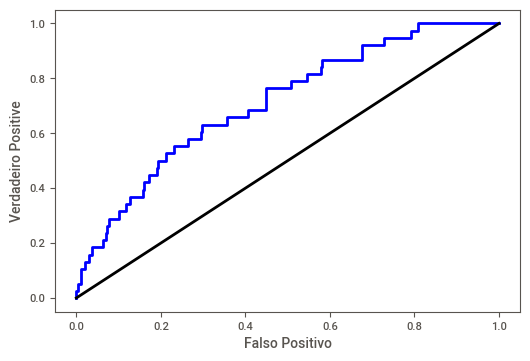

In [101]:
#Imprimindo o valor do AUC
print('ROC AUC: %.2f' % (roc_auc_score(y_test, y_pred)*100), '%')
#Plotando Curva AUC
y_probs = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, lw = 2, color ='blue')
plt.plot([0,1], [0,1], lw = 2, color ='black')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positive')

#### **Modelagem Preditiva pelo Metodo de Gradiente Bossting**

In [119]:
#Definindo o Modelo de Gradiente Boosting
model = GradientBoostingClassifier(learning_rate = 0.1, 
                                    max_depth = 2, 
                                    n_estimators = 200, 
                                    max_features = 8, 
                                    random_state = 42)
model.fit(x, y)

GradientBoostingClassifier(max_depth=2, max_features=8, n_estimators=200,
                           random_state=42)

In [120]:
#Aplicando o Modelo na base de teste
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)

In [121]:
#Imprimindo os Resultados do Modelo
#Relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits = 4))
#Acuracidade
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))
#AUC
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9841    0.7428    0.8466       416
           1     0.2357    0.8684    0.3708        38

    accuracy                         0.7533       454
   macro avg     0.6099    0.8056    0.6087       454
weighted avg     0.9214    0.7533    0.8068       454

Acurácia: 0.7533

AUC: 0.8056



ROC AUC: 80.56 %


Text(0, 0.5, 'Verdadeiro Positive')

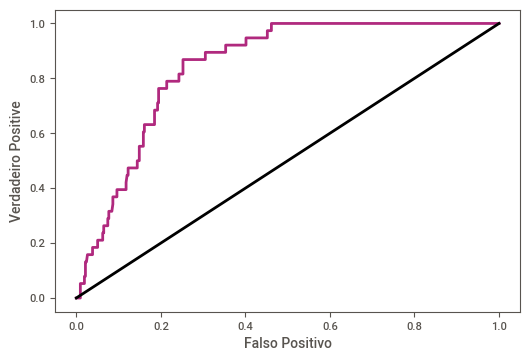

In [123]:
#Imprimindo o valor do AUC
print('ROC AUC: %.2f' % (roc_auc_score(y_test, y_pred)*100), '%')
#Plotando Curva AUC
y_probs = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, lw = 2, color ='#B0297E')
plt.plot([0,1], [0,1], lw = 2, color ='black')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positive')

#### **Analisando as Variaveis mais Explicativas para o Churn**

In [110]:
#Selecionando as variaveis mais explicativas para o Churn em ordem crescente
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = x.columns,
                                   columns = ['Importance']).sort_values('Importance', ascending = False) 

In [111]:
#Selecionando as top 10
top_feature = feature_importances.head(10)

In [112]:
#Visualizando as top 10
top_feature

,Importance
TT_SUPORTE_MOTIVO_22,0.086603
TT_SUPORTE_MOTIVO_18,0.069112
TT_SUPORTE_MOTIVO_20,0.061828
TT_SUPORTE_MOTIVO_23,0.057049
TT_SUPORTE_MOTIVO_11,0.056039
VALOR_MEDIO_PLANO,0.049007
TT_SUPORTE_MOTIVO_1,0.043604
TEMPO_MESES_CONTRATO,0.039810
TT_SUPORTE_MOTIVO_19,0.039509
QTD_TOTAL_RECARGAS,0.030482


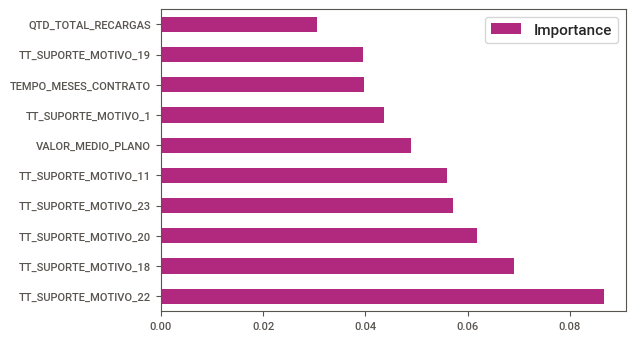

In [114]:
#Plotando as top 10
top_feature.plot(kind = 'barh', color = '#B0297E')